# Distance Metrics

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, minkowski
from sklearn.preprocessing import StandardScaler

In [2]:
# FIFA 17 Players Dataset
path = r"C:\Samarth\SEM 4\Unsupervised machine learning\FIFA PLAYER DATASET\Dataset\FullData.csv"
df = pd.read_csv(path)

In [9]:
df

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,NaN,Wexford Youths,Sub,30.0,02/01/2016,2020.0,45,...,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Republic of Ireland,NaN,NaN,Longford Town,Sub,28.0,01/01/2016,2020.0,45,...,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,England,NaN,NaN,Swindon Town,Res,32.0,03/03/2015,2023.0,45,...,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Scotland,NaN,NaN,Ross County,Sub,45.0,03/02/2016,2017.0,45,...,12,13,12,24,12,40,45,44,43,45


In [51]:
# Taking random Features
selected_features = ['Ball_Control', 'Dribbling', 'Marking']
df.dropna(subset=selected_features, inplace=True)

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected_features])

In [6]:
row1 = df_scaled[0]
row2 = df_scaled[1]

In [7]:
# Calculate Euclidean distance
euclidean_dist = euclidean(row1, row2)

# Calculate Manhattan distance
manhattan_dist = cityblock(row1, row2)

# Calculate Minkowski distance with p=3 (can be changed)
minkowski_dist = minkowski(row1, row2, p=3)

In [8]:
print("Euclidean Distance:", euclidean_dist)
print("Manhattan Distance:", manhattan_dist)
print("Minkowski Distance:", minkowski_dist)

Euclidean Distance: 0.5081744136054249
Manhattan Distance: 0.8005876186062029
Minkowski Distance: 0.4528756468417188


## Inference

### 1. Euclidean Distance (0.5081744136054249):

-The Euclidean distance is relatively low, indicating that the points are close together.

### 2. Manhattan Distance (0.8005876186062029):

-The Manhattan distance is higher compared to the Euclidean distance, suggesting that the points may not be as close when considering the sum of absolute. 

### 3. Minkowski Distance (0.4528756468417188):

-In this case, the Minkowski distance is lower than both the Euclidean and Manhattan distances, suggesting that the points may be closer together when considering the Minkowski metric 

# Jaccard Distance

**Binary Data Comparison**: Jaccard distance is ideal for comparing binary data sets, where it measures dissimilarity based on shared or unshared elements.

**Set Similarity Measurement**: It quantifies set similarity by considering the intersection and union of elements, providing a straightforward measure of set dissimilarity.

**Suitable for Sparse Data**: Effective for sparse datasets, Jaccard distance focuses on non-zero elements, making it useful for text mining and recommendation systems.

**Insensitive to Magnitude**: It disregards element magnitudes, focusing solely on presence or absence, making it robust for sets of varying sizes.

**Widely Applicable**: Jaccard distance finds broad applications in information retrieval, bioinformatics, and pattern recognition, offering versatility in measuring similarity across domains.

In [11]:
import pandas as pd
from sklearn.metrics import jaccard_score

In [28]:
# Small MovieLens Dataset containing 100,000 rows
movie_ratings = pd.read_csv(r'C:\Samarth\SEM 4\Unsupervised machine learning\FIFA PLAYER DATASET\Assignment\ml-latest-small\ratings.csv')

### **AIM**:
For this dataset , I will be calculating the jaccard distance checking the similarity between different user and how similar/dissimilar are their taste in movies.I created a binary column that contains liked if the users rating for that movie greater than 4. Finally I'll be plotting a heatmaps visualizing the jaccard distance.

In [29]:
movie_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [30]:
threshold = 4
movie_ratings['liked'] = (movie_ratings['rating'] >= threshold).astype(int)

In [31]:
user_movie_ratings = movie_ratings.pivot_table(index='userId', columns='movieId', values='liked', fill_value=0)


In [33]:
movie_ratings.head()

,userId,movieId,rating,timestamp,liked
0,1,1,4.0,964982703,1
1,1,3,4.0,964981247,1
2,1,6,4.0,964982224,1
3,1,47,5.0,964983815,1
4,1,50,5.0,964982931,1


In [39]:
movie_ratings

,userId,movieId,rating,timestamp,liked
0,1,1,4.0,964982703,1
1,1,3,4.0,964981247,1
2,1,6,4.0,964982224,1
3,1,47,5.0,964983815,1
4,1,50,5.0,964982931,1
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,1
100832,610,168248,5.0,1493850091,1
100833,610,168250,5.0,1494273047,1
100834,610,168252,5.0,1493846352,1


In [43]:
subset_users = user_movie_ratings.index[:10] # Reducing Rows to decrease run time due to time constraints

In [44]:
jaccard_distance_matrix = pd.DataFrame(index=subset_users, columns=subset_users)

In [45]:
for user1 in subset_users:
    for user2 in subset_users:
        user1_ratings = user_movie_ratings.loc[user1]
        user2_ratings = user_movie_ratings.loc[user2]
        jaccard_similarity = jaccard_score(user1_ratings, user2_ratings)
        jaccard_distance = 1 - jaccard_similarity
        jaccard_distance_matrix.loc[user1, user2] = jaccard_distance


In [46]:
print(jaccard_distance_matrix)


userId       1         2         3         4         5         6         7    \
userId                                                                         
1            0.0  0.990783  0.990654  0.910299  0.962791   0.95092  0.941176   
2       0.990783       0.0       1.0       1.0       1.0   0.99375       1.0   
3       0.990654       1.0       0.0       1.0       1.0       1.0       1.0   
4       0.910299       1.0       1.0       0.0  0.972789  0.977273  0.957895   
5       0.962791       1.0       1.0  0.972789       0.0  0.921569  0.978022   
...          ...       ...       ...       ...       ...       ...       ...   
96      0.890351  0.985915       1.0   0.95977  0.898551  0.957219  0.930435   
97      0.973094  0.978723       1.0  0.987097       1.0  0.988166  0.946809   
98      0.976654  0.962025       1.0  0.973118  0.988235  0.990148  0.918699   
99      0.978261  0.981132       1.0  0.993827  0.964286  0.886792  0.980583   
100     0.941379       1.0       1.0  0.

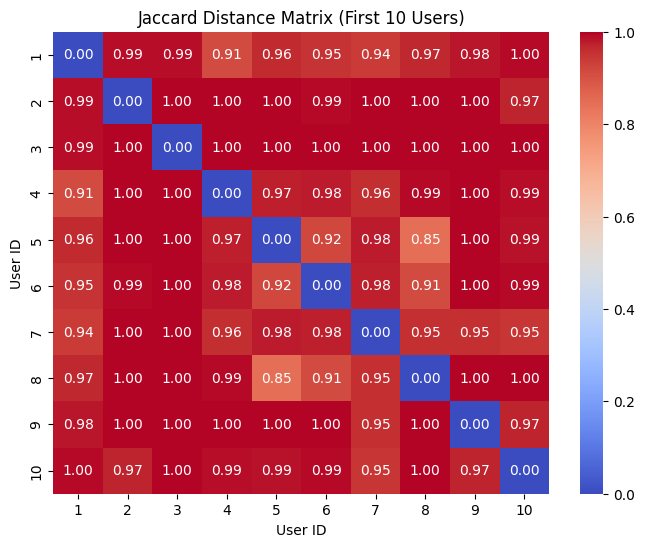

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

jaccard_distance_matrix_subset = jaccard_distance_matrix.iloc[:10, :10]

plt.figure(figsize=(8, 6))
sns.heatmap(jaccard_distance_matrix_subset, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Jaccard Distance Matrix (First 10 Users)')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()



### **Inference from Heatmap**

The final heatmap shows maximum dissimmilarity between all the user. This is due to reduction of the dataset to only 10 users. If the full dataset containing 1,00,000 rows and 610 users is used the outcome might be completely different.

## **Real World Application**

**Personalized Recommendations**: Distance metrics assist in recommending relevant items or content to users based on their preferences and similarities to other users.

**Grouping and Classification**: They aid in clustering similar data points together and classifying observations, enabling effective organization and analysis of data.

**Anomaly Detection**: Distance metrics help identify anomalies or outliers within datasets by quantifying the deviation of data points from the norm.

**Pattern Recognition**: Used in image processing, signal analysis, and bioinformatics, they facilitate pattern recognition tasks by measuring similarity between images, signals, or biological sequences.